# PR 8.1 en 8.2

Van Pjotr en Sennen

Hierin maken we de opdrachten 8.1 en 8.2. We hebben de opdrachten samen gemaakt en hebben de code ook samen geschreven. We hebben de code in een notebook gezet en de code is uitgevoerd in een Jupyter Notebook.

Hieronder zullen we de libaries importeren die we nodig hebben voor de opdrachten.

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings


In [52]:
df = pd.read_csv('titanic.csv', sep=',')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [53]:
df = df.rename({
    'pclass':'Pclass',
    'sex':'Sex',
    'age':'Age',
})
df = df.loc[:,['pclass', 'sex','age']]
df

,pclass,sex,age
0,1,female,29.0000
1,1,male,0.9167
2,1,female,2.0000
3,1,male,30.0000
4,1,female,25.0000
...,...,...,...
1304,3,female,14.5000
1305,3,female,NaN
1306,3,male,26.5000
1307,3,male,27.0000


In [54]:
dummies = pd.get_dummies(df[['sex']])

mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

df[df.isna().any(axis=1)]

dummies

,sex_female,sex_male
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
...,...,...
1304,True,False
1305,True,False
1306,False,True
1307,False,True


In [55]:
df = pd.concat([df, dummies], axis=1)
df.drop(['sex'], axis=1)
df = df.loc[:,['pclass', 'sex_female', 'sex_male','age']]
df

,pclass,sex_female,sex_male,age
0,1,True,False,29.000000
1,1,False,True,0.916700
2,1,True,False,2.000000
3,1,False,True,30.000000
4,1,True,False,25.000000
...,...,...,...,...
1304,3,True,False,14.500000
1305,3,True,False,29.881135
1306,3,False,True,26.500000
1307,3,False,True,27.000000


In [56]:
x = df.drop('age', axis=1)
y = df.loc[:,['age']]
x

,pclass,sex_female,sex_male
0,1,True,False
1,1,False,True
2,1,True,False
3,1,False,True
4,1,True,False
...,...,...,...
1304,3,True,False
1305,3,True,False
1306,3,False,True
1307,3,False,True


In [57]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

In [58]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x_train,y_train)
reg_model

LinearRegression()

In [59]:
y_pred = reg_model.predict(x_test)
y_pred

array([[26.84375 ],
       [26.84375 ],
       [26.84375 ],
       [26.84375 ],
       [26.84375 ],
       [37.640625],
       [26.84375 ],
       [32.234375],
       [26.84375 ],
       [34.703125],
       [26.84375 ],
       [26.84375 ],
       [23.90625 ],
       [26.84375 ],
       [26.84375 ],
       [23.90625 ],
       [26.84375 ],
       [23.90625 ],
       [34.703125],
       [26.84375 ],
       [23.90625 ],
       [37.640625],
       [26.84375 ],
       [37.640625],
       [26.84375 ],
       [23.90625 ],
       [32.234375],
       [29.296875],
       [23.90625 ],
       [34.703125],
       [32.234375],
       [32.234375],
       [23.90625 ],
       [34.703125],
       [32.234375],
       [26.84375 ],
       [34.703125],
       [32.234375],
       [34.703125],
       [37.640625],
       [29.296875],
       [26.84375 ],
       [29.296875],
       [26.84375 ],
       [26.84375 ],
       [26.84375 ],
       [26.84375 ],
       [23.90625 ],
       [29.296875],
       [23.90625 ],


In [60]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: 'predicted_age'})
prediction_df

,predicted_age
0,26.843750
1,26.843750
2,26.843750
3,26.843750
4,26.843750
...,...
192,26.843750
193,32.234375
194,26.843750
195,26.843750


In [61]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['age'], prediction_df], axis=1)
y_test_prediction_merge.loc[y_test_prediction_merge['predicted_age'].notna(),:]

,age,predicted_age
0,35.000000,26.843750
1,20.000000,26.843750
2,29.881135,26.843750
3,29.881135,26.843750
4,29.881135,26.843750
...,...,...
192,28.000000,26.843750
193,29.881135,32.234375
194,29.881135,26.843750
195,22.000000,26.843750


<function matplotlib.pyplot.show(close=None, block=None)>

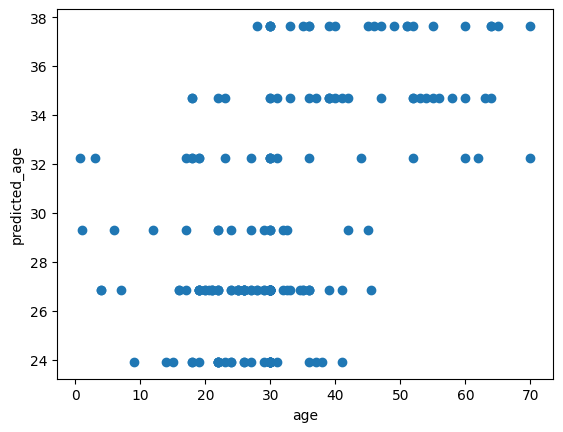

In [62]:
plt.scatter(y_test_prediction_merge['age'], y_test_prediction_merge['predicted_age'])
plt.xlabel('age')
plt.ylabel('predicted_age')
plt.show

In [63]:
mean_squared_error(y_test_prediction_merge['age'], y_test_prediction_merge['predicted_age'])

132.89844365614786

In [64]:
mean_absolute_error(y_test_prediction_merge['age'], y_test_prediction_merge['predicted_age'])

8.411938202337161